In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import timeit
import itertools

In [2]:
df = pd.read_excel('Course_Advisory_Data.xlsx')

del_vals = df[(df.Semester == 20111) | (df.Semester == 20121) | (df.Semester == 20123) | (df.Semester == 20131)].index.values
df.drop(del_vals,axis = 0,inplace = True)

df.columns = df.columns.str.replace(' ', '_')

df = df.rename(columns={'Sr._No':'Sr_No'})

f = open("course_del.txt",'r')
l = [i[:-1] if i[-1] == '\n' else i for i in f]
for i in l:
    del_vals = df[df.Course_Title == i].index.values
    df.drop(del_vals,axis = 0,inplace = True)
    
v = df.Semester == "Spring 2016"
df.Semester[v] = "2016A"
v = df.Semester == "Summer 2016"
df.Semester[v] = "2016B"
v = df.Semester == "Fall 2016"
df.Semester[v] = "2016C"

v = df.Semester == "Spring 2017"
df.Semester[v] = "2017A"
v = df.Semester == "Summer 2017"
df.Semester[v] = "2017B"
v = df.Semester == "Fall 2017"
df.Semester[v] = "2017C"

v = df.Semester == "Spring 2018"
df.Semester[v] = "2018A"
v = df.Semester == "Summer 2018"
df.Semester[v] = "2018B"
v = df.Semester == "Fall 2018"
df.Semester[v] = "2018C"

v = df.Semester == "Spring 2019"
df.Semester[v] = "2018A"
v = df.Semester == "Summer 2019"
df.Semester[v] = "2019B"
v = df.Semester == "Fall 2019"
df.Semester[v] = "2019C"


d = df
df["Dept"] = None

department = ["EE.txt","AF.txt"]

Ei = []
f = open("EE.txt",'r')
dept = [i[:-1] if i[-1] == '\n' else i for i in f]
for i in dept:
    Ei.extend(df[df.Course_Title == i].Sr_No.values.tolist())

Bi = [];
dept = []
f = open("AF.txt",'r')
dept = [i[:-1] if i[-1] == '\n' else i for i in f]
for i in dept:
    Bi.extend(df[df.Course_Title == i].Sr_No.values.tolist())



for i in Ei:
    l = df[df.Sr_No == i].index.tolist()
    for j in l:
        df.Dept.loc[j] = "EE"
    
for i in Bi:
    l = df[df.Sr_No == i].index.tolist()
    for j in l:
        df.Dept.loc[l] = "AF"

df.Dept.fillna("CS", inplace = True)

C:\Users\Waqar_Shakeel\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Waqar_Shakeel\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Waqar_Shakeel\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Waqar_Shakeel\Anaconda3\lib\site-packages\ipykernel_launcher.py:24:

#   SGPA of a student (Bar Plot):

##### For Specific Roll number

In [3]:
def SGPA(roll_no):
    
    fig, axes = plt.subplots(figsize=(14, 5))
    
    v = df[df.Sr_No == roll_no]
    objects = v.Semester.unique()
    print(objects)
    SGPAs = v.groupby('Semester').SGPA.mean()
    sem_labels  = SGPAs.index
    SGPAs       = SGPAs.values
    axes.bar(sem_labels, SGPAs, align="center", width=0.5, alpha=0.5,color = 'b')
    
    axes.set_ylabel('SGPA')
    axes.set_title('Semester_SGPA')
    axes.set_ylim([df.SGPA.min(),df.SGPA.max()])

['2017C' '2018A' '2018C' '2019C']


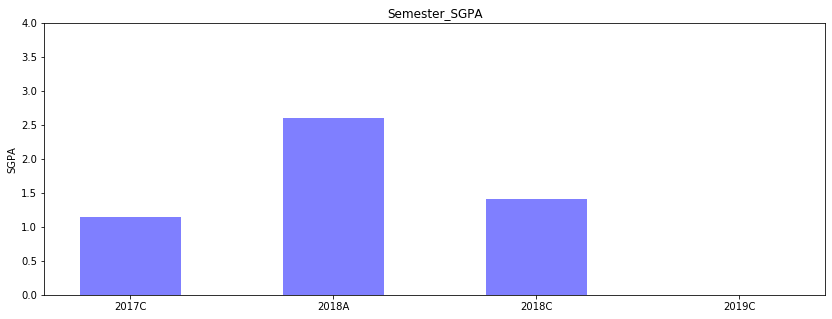

In [4]:
SGPA(17134)

It is a Bar plot. This Graph is showing the SGPA’s of a student in the Relevant Semesters. 
On the Y-Axis ,we have SGPA’s of the student and on the X-axis we have the Semesters in which student got the GPA.

# Average GPA of Semesters (Bar Plot):

In [5]:
def SGPA_Mean():
    fig, axes = plt.subplots(figsize=(14, 5))

    SGPAs = df.groupby('Semester').SGPA.mean()
    sem_labels  = SGPAs.index
    SGPAs       = SGPAs.values
    axes.bar(sem_labels, SGPAs, align="center", width=0.5, alpha=0.5,color = 'b')

    axes.set_ylabel('SGPA')
    axes.set_title('Semester_SGPA')
    axes.set_ylim([df.SGPA.min(),df.SGPA.max()])

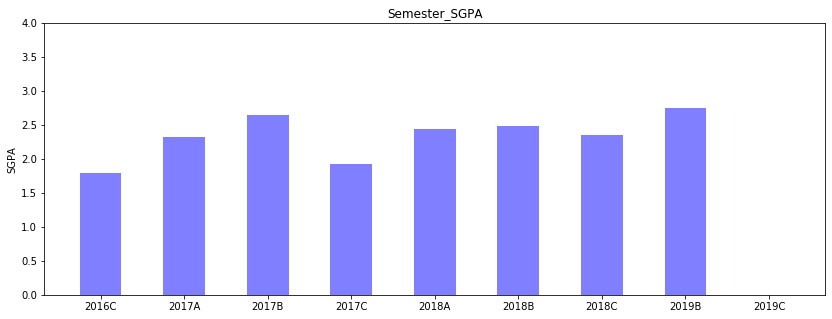

In [6]:
SGPA_Mean()

This Graph shows the Average GPA’s of the university in the relevant Semesters .On the Y-Axis we have GPA ranging from 0-4 and the X-Axis we have Semesters .
A,B,C on the X-Axis with semesters represents Spring ,Summer and Fall respectively. 

Text(0, 0.5, 'SGPA')

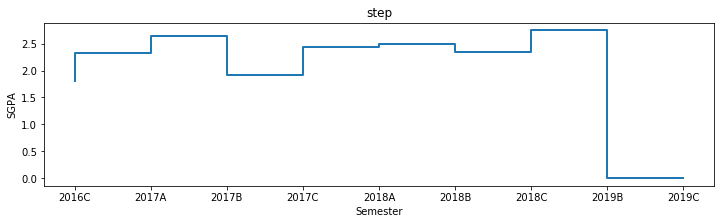

In [7]:
df=df.sort_values('Semester')
df
mean=df.groupby('Semester').SGPA.mean()
fig, axes = plt.subplots(figsize=(12,3))
objects = df.Semester.unique()

axes.step(objects,mean, lw=2)
axes.set_title("step")
axes.set_xlabel("Semester")
axes.set_ylabel("SGPA")

It’s a Step Graph showing the SPA’s of  students . On the Y-Axis ,we have SGPA’s of the students and on the X-axis we have the Semesters in which they got the GPA.
A,B,C on the X-Axis with semesters represents Spring ,Summer and Fall respectively.  


# GPA Comparison of two Students:

In [8]:
def compare_students(roll,roll2):    
    df1=df.sort_values('Semester')
    student1=df1[df1.Sr_No==roll]
    student2=df1[df1.Sr_No==roll2]
    #print(student1.values)
    
    mean=student1.groupby('Semester').SGPA.mean()
    mean1=student2.groupby('Semester').SGPA.mean()
    fig, axes = plt.subplots(figsize=(12,3))
   
    objects = student1.Semester.unique()
    print(objects)
    axes.step(objects,mean, lw=2)
    axes.step(objects,mean1, lw=2)
    
    axes.set_title("step")
    axes.set_xlabel("Semester")
    axes.set_ylabel("SGPA")
    axes.set_ylim([0,4])
    
    #fig, axes = plt.subplots(figsize=(12,3))
    #objects = df.Semester.unique()

    #axes.step(objects,mean, lw=2)
    #axes.set_title("step")
    #axes.set_xlabel("Semester")
    #axes.set_ylabel("SGPA")
    #axes.set_ylim([0,1])

['2017C' '2018A' '2018C' '2019C']


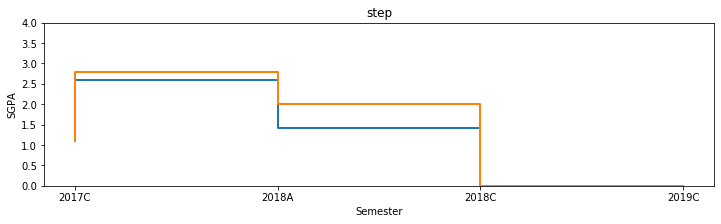

In [9]:
compare_students(17134,17087)

Its also a Step Graph showing the GPA’s of two students in the following Semesters. On the Y-Axis ,we have SGPA’s of the students and on the X-axis we have the Semesters in which they got the GPA.
A,B,C on the X-Axis with semesters represents Spring ,Summer and Fall respectively.


## Check Sepecfic Grade of a Student

In [10]:
def courses_with_grade(roll_no,grade):
    student = df[df.Sr_No == roll_no]
    return student[student.Grade == grade]

In [11]:
courses_with_grade(17249,'C+')

,Sr_No,Semester,Course_Code,Course_Title,Credit_Hours,Grade,Grade_Point,SGPA,CGPA,Warning,Dept
32916,17249,2017C,CS101,Introduction to Computing,3,C+,2.33,3.41,3.41,0,CS
32938,17249,2018A,CS203,Database Systems,3,C+,2.33,3.10,3.20,0,CS


# Plot Average grade of Specific Subject

In [12]:
def check_avg_grade(subject):
    
    v = df[df.Course_Code == subject]
    result = v.groupby('Grade').Grade.value_counts()
    
    labels = result.index
    labels = [i[0] for i in labels]
    
    sizes = result.values
    
    fig1, ax1 = plt.subplots(figsize=(8, 8))
    ax1.pie(sizes, labels=labels)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.legend(
    loc='upper right',
    labels=['%s, %1.1f%%' % (l, (float(s)/sizes.sum())*100) for l, s in zip(labels, sizes)],
    prop={'size': 13},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

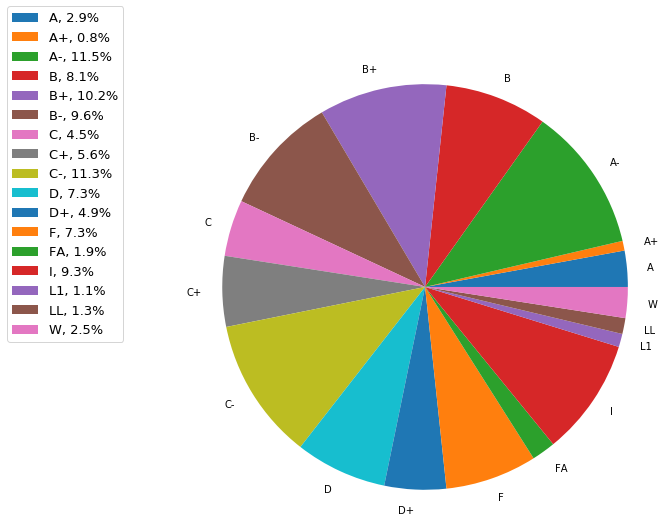

In [13]:
check_avg_grade("SS113")

It’s a Pie Graph showing the percentages of the Grades of a course in all the Semesters.

# CGPA Count of Students: 

In [14]:
def plot_hist():
    fig, axes = plt.subplots()

    plot_this = df[df.CGPA > 0].groupby("Sr_No").CGPA.mean()
    axes.hist(plot_this,rwidth=0.95)
    axes.set_title("CGPA")
    axes.set_xlim((min(plot_this), max(plot_this)))
    axes.set_ylabel("unit")

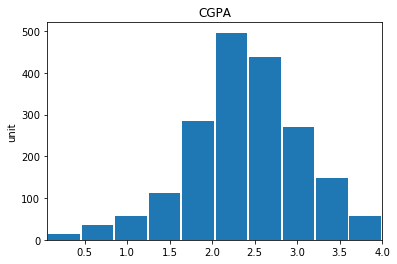

In [15]:
plot_hist()

It’s a Histogram ,showing the number of Students in a range of CGPA .On the X-Axis we have Number of Students and on the Y-Axis we have the the Range of CGPA .

#### Shape of Histogram

Negatively Skewed

# Grade Percentage Graph of a Course:

In [16]:
def check_avg_grade1():
    no_of_semesters=df.Semester.unique()
    grades=df.Grade.unique()
    result = df.groupby('Semester').Grade.value_counts().unstack(fill_value=0).stack()
    list_of_grades=[]
    for semester in no_of_semesters:
        array1=[]
        for grade in grades:
            array1.append(result[semester][grade])
        list_of_grades.append(array1)
    no_of_plots=np.arange(len(no_of_semesters))
    width=0.35
    list_of_grade=np.array(list_of_grades)
    list_of_grade=list_of_grade.transpose()
    shape=list_of_grade.shape
    fig, axes = plt.subplots(figsize=(10,6))
    for outer in range(shape[0]):
        #for inner in range(shape[1]):
        axes.bar(no_of_plots,list_of_grade[outer]/10062, width)
            
    axes.set_ylabel('percentage')
    axes.set_title('Percentage of course in semester')
    axes.set_xticks(np.arange(len(no_of_semesters)))
    axes.set_xticklabels(no_of_semesters)
    
    plt.setp(axes.get_xticklabels(),rotation=45,ha='right',rotation_mode='anchor')
    axes.legend(loc='upper left',labels=grades)
    #axes.yticks(np.arange(0, 4, 0.5))
    axes.set_ylim([0,1])

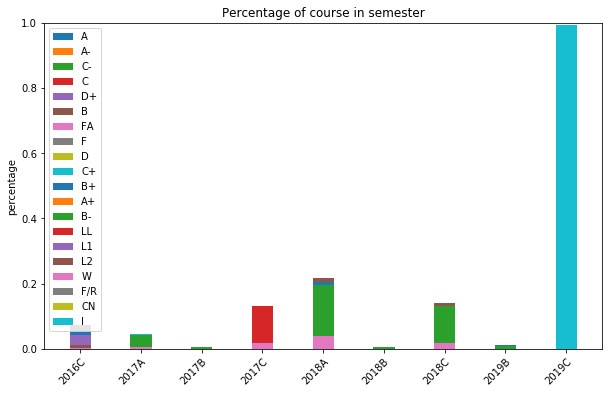

In [17]:
check_avg_grade1()

This Graph shows the Percentage of a Course in all the Semesters .On the X-Axis ,we have Semesters and on the Y-Axis ,we have percentage of that Course in each Semester. A,B,C on the X-Axis with semesters represents Spring ,Summer and Fall respectively.

# Heat Map of grades in each Semester:

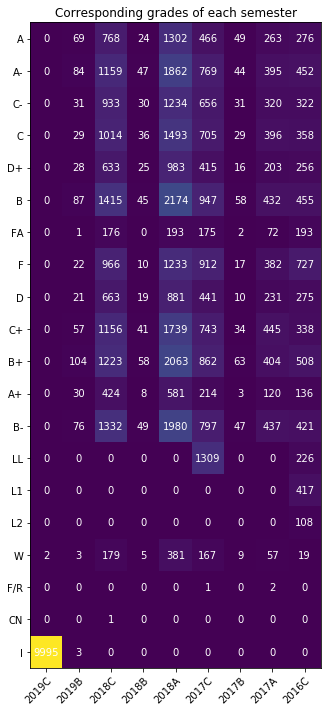

In [18]:
import matplotlib.pyplot as plt

semesters = df.Semester.unique() #x-axis

grades=df.Grade.unique() #y-axis

list_of_grades=[]

result = df.groupby('Semester').Grade.value_counts().unstack(fill_value=0).stack()
for semester in semesters:
    array1=[]
    for grade in grades:
        array1.append(result[semester][grade])
    list_of_grades.append(array1)

grades1=np.array(list_of_grades)

grades1=grades1.transpose()  
fig, ax = plt.subplots(figsize=(10,10))

im = ax.imshow(grades1)


ax.set_xticks(np.arange(len(semesters)))

ax.set_yticks(np.arange(len(grades)))




ax.set_ylim(len(grades)-0.5, -0.5)
ax.set_xlim(len(semesters)-0.5, -0.5)


ax.set_xticklabels(semesters)

ax.set_yticklabels(grades)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

for i in range(len(grades)):
    for j in range(len(semesters)):
        text = ax.text(j, i, grades1[i,j],
                       ha="center", va="center", color="w")
ax.set_title("Corresponding grades of each semester")
fig.tight_layout()
plt.show()

It’s a Heat map showing the number of grades in each semester by all the Semesters .Yellow Sign shows the most occurred value in Table .It helps us to see the overall view of the Grades in all the Semesters . On the X-Axis ,we have Semesters and on the Y-Axis ,we have the grade of that Course in each Semester. A,B,C on the X-Axis with semesters represents Spring ,Summer and Fall respectively.

# Box Plot 

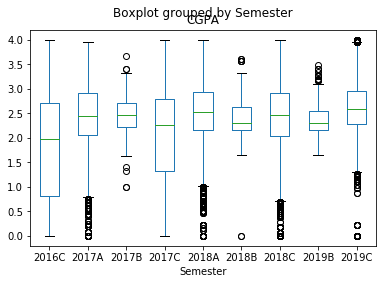

In [19]:
# display 5 rows of dataset 
df.boxplot(by ='Semester', column =['CGPA'], grid = False)

It’s a Box plot showing the GPA range of students in each Semester . The Dots in the graph are the outliers and four parts of each plot tells Q1,Q2,Q3,Q4 respectively . . On the X-Axis ,we have Semesters and on the Y-Axis ,we have the GPA range of students. A,B,C on the X-Axis with semesters represents Spring ,Summer and Fall respectively.

In [26]:
def Student_Count():
    fig, axes = plt.subplots(figsize=(14, 5))

    Dept = df.groupby('Dept').Sr_No.count()
    Dept_labels  = Dept.index
    count       = Dept.values
    axes.bar(Dept_labels, count, align="center", width=0.5, alpha=0.5,color = 'b')

    axes.set_ylabel('Population')
    axes.set_title('Polulation_Dept')
    #axes.set_ylim([df.SGPA.min(),df.SGPA.max()])

In [24]:
SGPAs = df.groupby('Dept').Sr_No.count()
SGPAs

Dept
AF    26729
CS    26322
EE     7766
Name: Sr_No, dtype: int64